### Avocado Price & Region Prediction

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 


In [158]:
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


### In this dataset we see the input features as 
1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

### Target Variables as:
1. AveragePrice - the average price of a single avocado
2. Region - the city or region of the observation

In this dataset, we can have 2 targets i.e., 
1. Average price which is continous data, so it is considered as regression problem.
2. Region which is categorical data, so its considered as classification problem.

So, in this we will be building 2 models one regression and the other classification model.

In [159]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [160]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [161]:
df.shape

(18249, 14)

we see that there are 18249 observations and 14 columns in this dataset

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


We see that there are 18249 rows and 14 columns out of which 9 columns are float, 2 columns are integer and 3 columns are of object datatype, We see there are no null values in this dataset

In [163]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We see there are no null values in this dataset, next we will check with value counts of each column

In [164]:
#check for value_counts
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

we see that this dataset doesnot contain any of the whitespaces or null values so, the dataset is clear. Next we will check for the description of the dataset.

In [165]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We observe that
1. All the counts are equal.
2. standard deviation are less compared to mean in all columns except Total Baggs, Small Bags, XLarge Bags.
3. There is right skewness in Total Volume, Large and XLarge Bags Columns
4. There is slight left skewness in 4046 and small Bags columns.
5. There are outliers in some of the columns.
6. we need to scale the data, since all the observations are not in same scale.

In [166]:
# we see that unnamed column is almost same like index values so we will drop unnamed column
df.drop("Unnamed: 0",axis=1, inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [167]:
#Next we will divide the date into date, month and year
df[['Year','Month','Date']] = df['Date'].str.split("-",expand = True)

In [168]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12
3,06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,02
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,01
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,01
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,01


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Year          18249 non-null  object 
 14  Month         18249 non-null  object 
dtypes: float64(9), int64(1), object(5)
memory usage: 2.1+ MB


In [170]:
#we will convert day, month year to int datatype
df[['Year','Month','Date']] = df[['Year','Month','Date']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int32  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Year          18249 non-null  int32  
 14  Month         18249 non-null  int32  
dtypes: float64(9), int32(3), int64(1), object(2)
memory usage: 1.9+ MB


since we have 2 year columns we will check both columns value are same, if same we will drop one of the column

In [171]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [172]:
df['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

In [173]:
df.drop('year', axis=1, inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1


#### Now we will go the graphical analysis of the dataset.


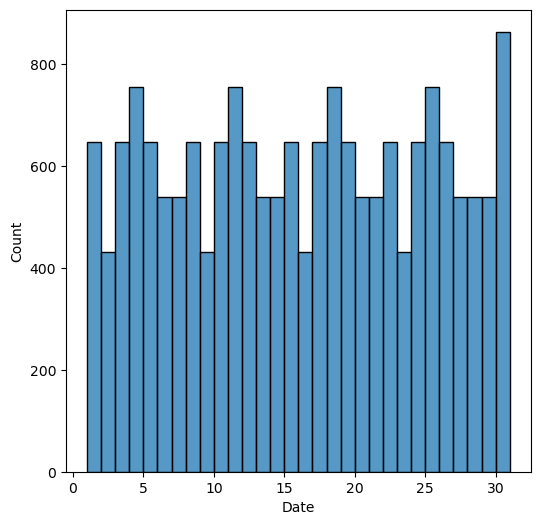

In [174]:
plt.figure(figsize=(6,6))
sns.histplot(x='Date', data=df,bins=30)
plt.show()

We see there is increase in sales after 5-6 days in a week. May be on saturdays and sundays there is a increase in sales

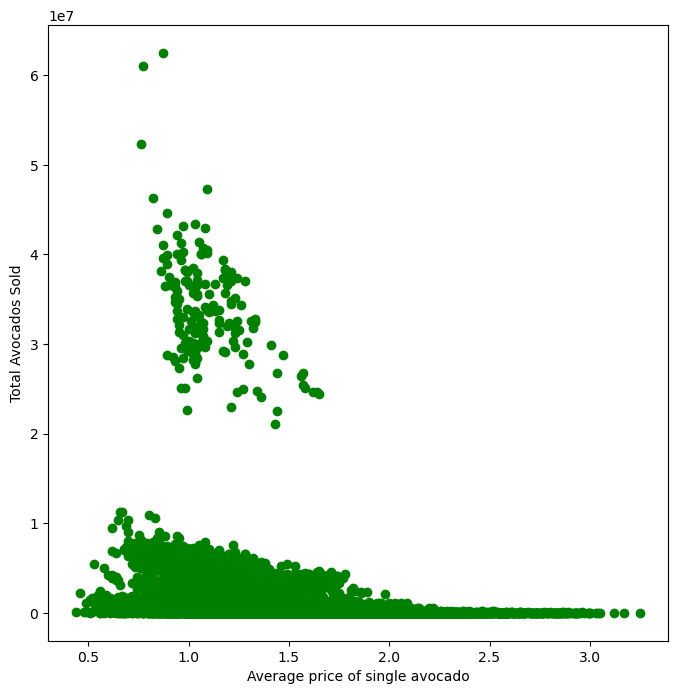

In [175]:
plt.figure(figsize = (8,8))
plt.scatter(df['AveragePrice'],df['Total Volume'], c='Green')
plt.xlabel("Average price of single avocado")
plt.ylabel("Total Avocados Sold")
plt.show()

we see that most of the time avocados sold are 1,3 and 4 and huge avocados are sold with price ranging from 0.5 to 2 per avocado.

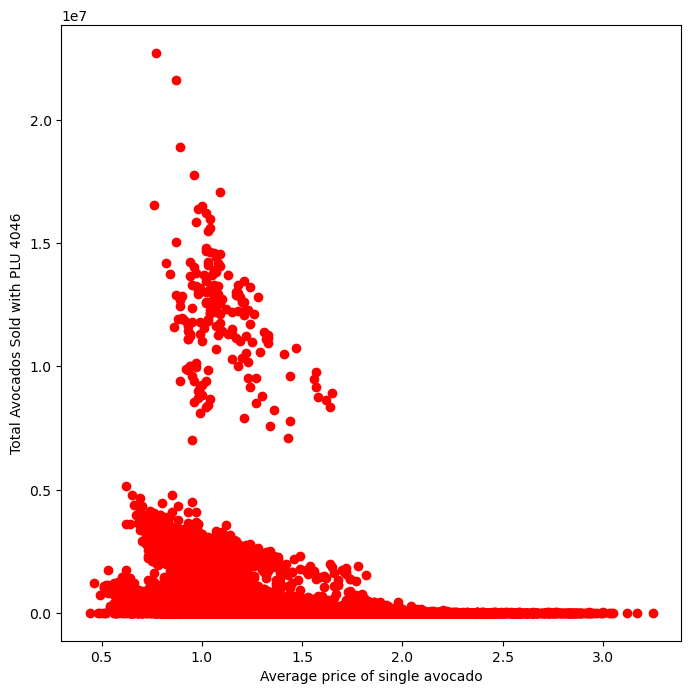

In [176]:
plt.figure(figsize = (8,8))
plt.scatter(df['AveragePrice'],df['4046'], c='Red')
plt.xlabel("Average price of single avocado")
plt.ylabel("Total Avocados Sold with PLU 4046")
plt.show()

we see that total avocados sold are between 0 to 0.5 and 1 to 1.5 with average price ranging between 0.5 to 2

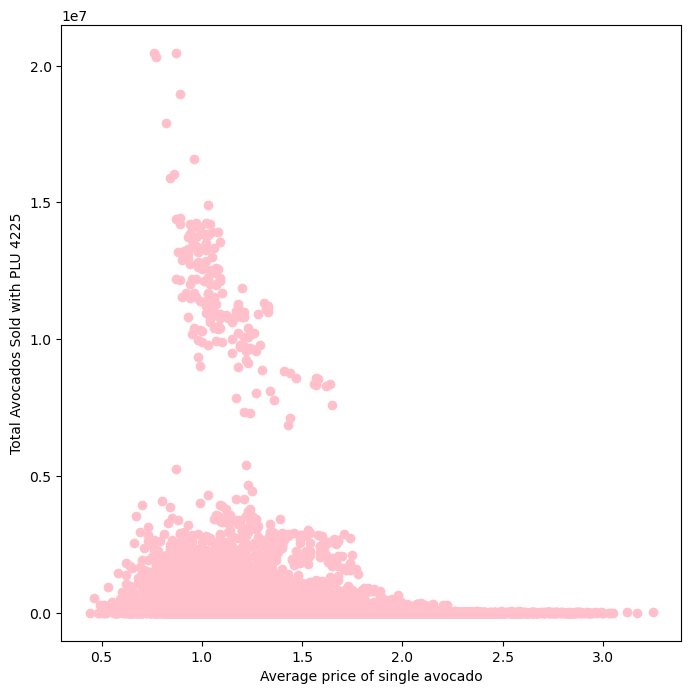

In [177]:
plt.figure(figsize = (8,8))
plt.scatter(df['AveragePrice'],df['4225'], c='pink')
plt.xlabel("Average price of single avocado")
plt.ylabel("Total Avocados Sold with PLU 4225")
plt.show()

we see that average price of a single avocado lies mostly between 0.5 to 2

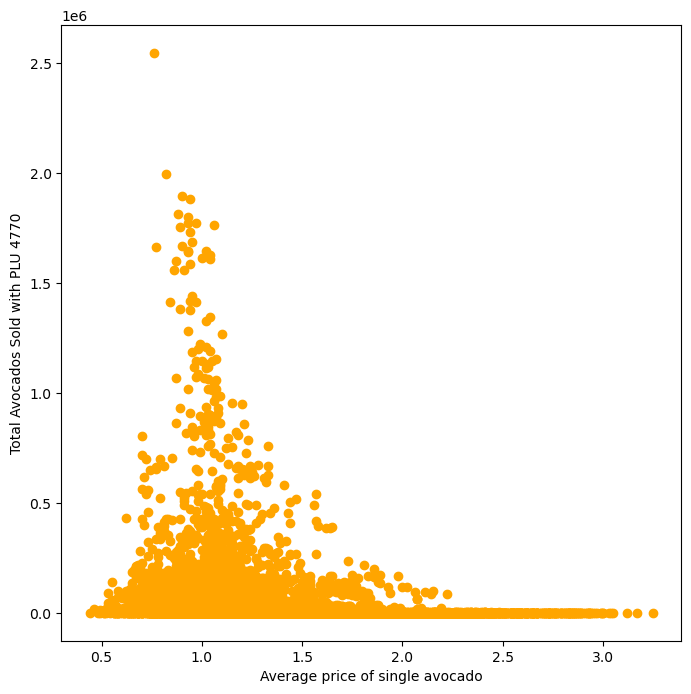

In [178]:
plt.figure(figsize = (8,8))
plt.scatter(df['AveragePrice'],df['4770'], c='Orange')
plt.xlabel("Average price of single avocado")
plt.ylabel("Total Avocados Sold with PLU 4770")
plt.show()

Here also we see that most of the avocados average price ranges from 0.5 to 2 

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


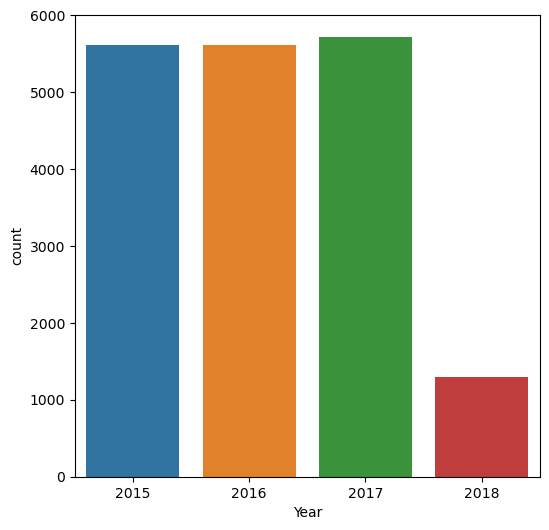

In [179]:
plt.figure(figsize=(6,6))
sns.countplot('Year',data=df)
print(df['Year'].value_counts())
plt.show()

we see almost same number of data for all the year except 2018.

conventional    9126
organic         9123
Name: type, dtype: int64


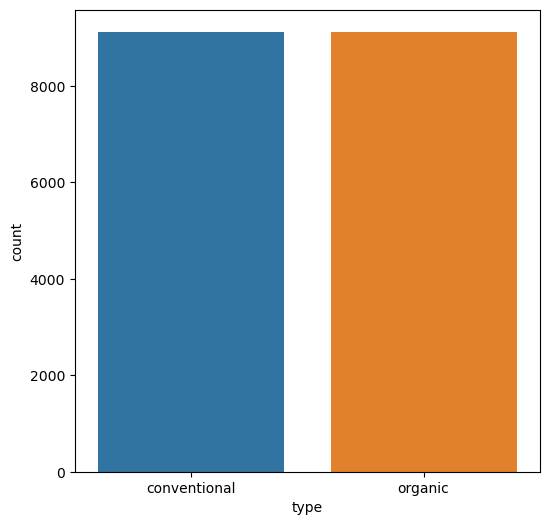

In [180]:
plt.figure(figsize=(6,6))
sns.countplot('type',data=df)
print(df['type'].value_counts())
plt.show()

We see almost there is equal data for both conventional and organic type of avocados

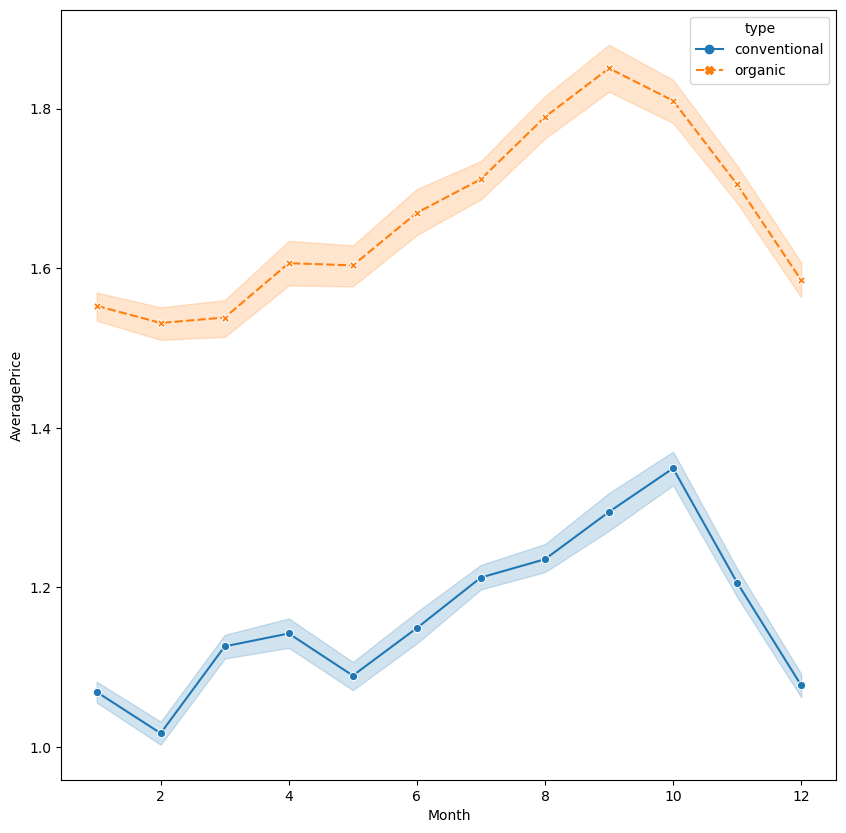

In [181]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df, markers=True, style='type')
plt.show()

We see there is huge sale of organic avocados in the month of september and conventional avocados in the month of october.

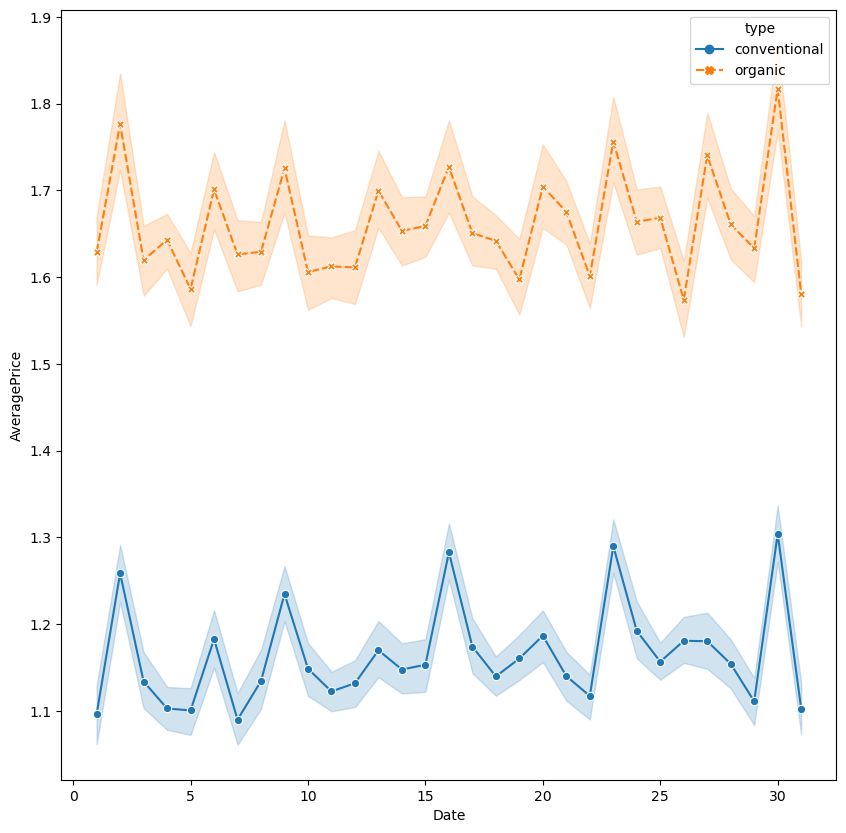

In [182]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Date", y="AveragePrice", hue='type', data=df, markers =True, style = 'type')
plt.show()

we see almost equal sales on both type of avocados on each day, we also see that there is huge sales after 6 days.

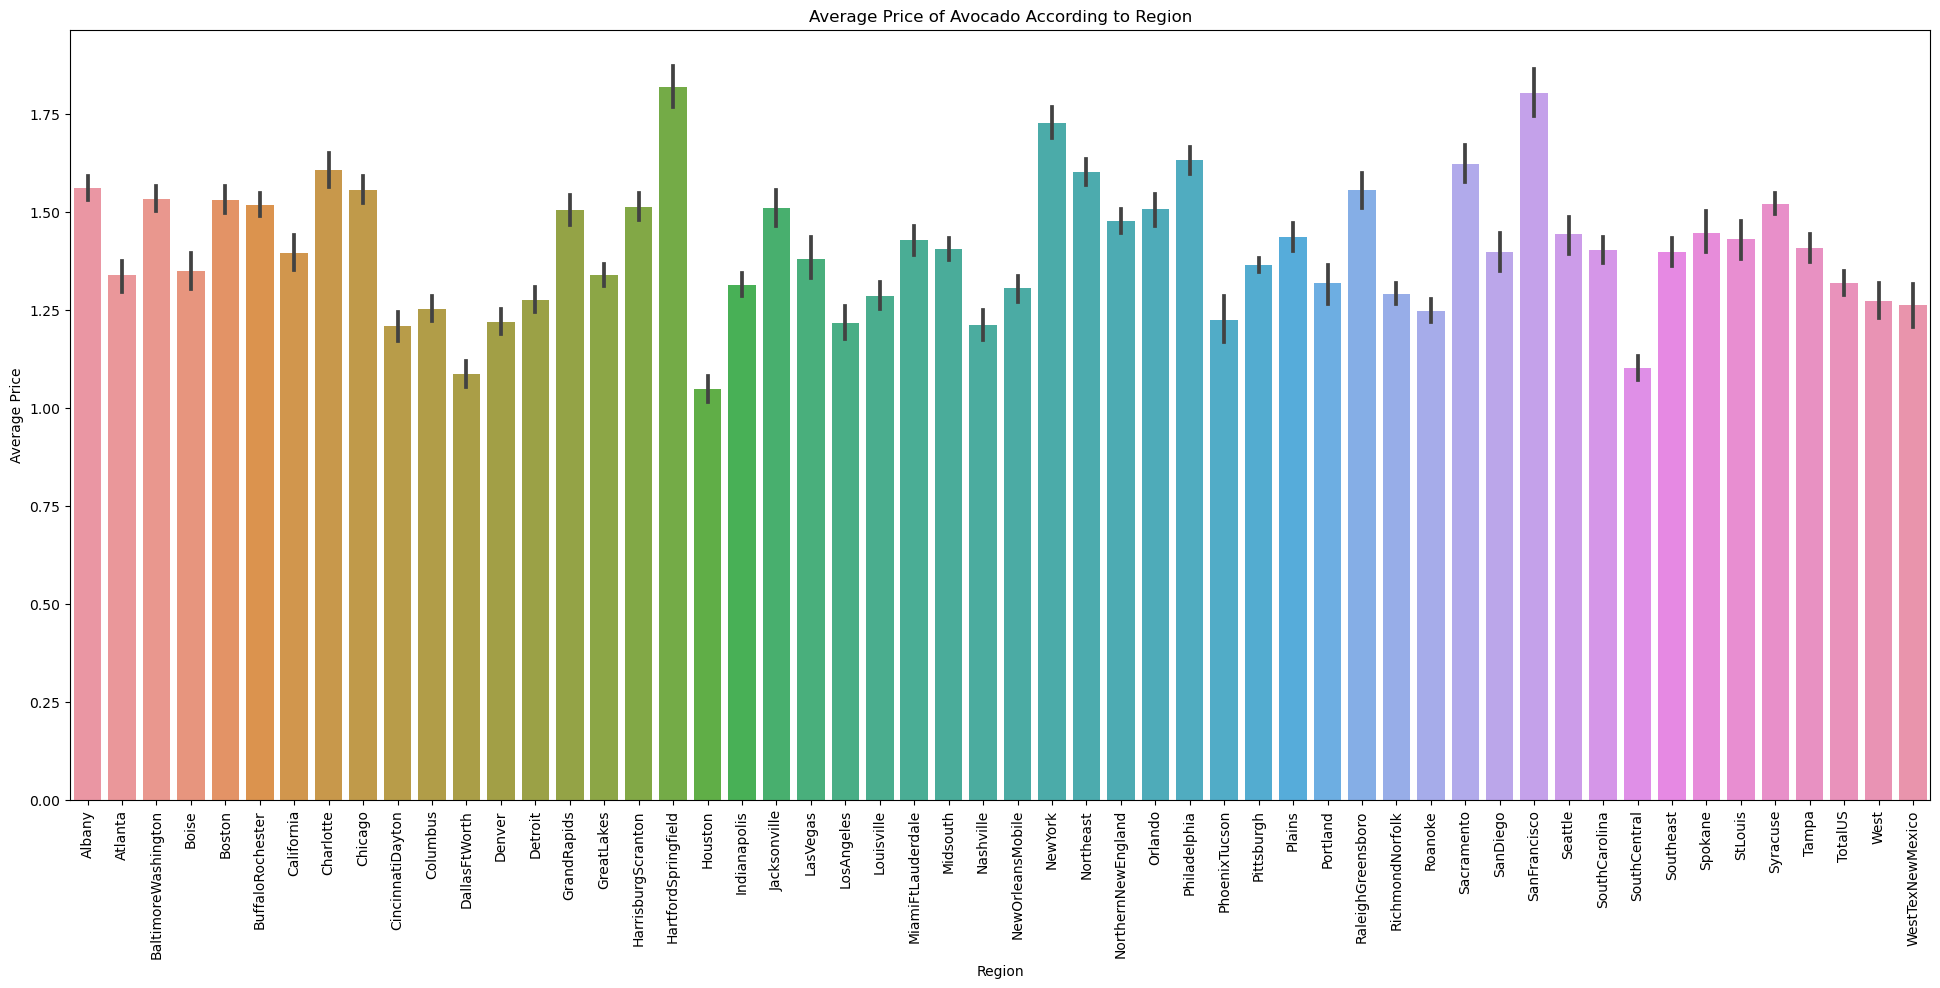

In [183]:
plt.figure(figsize=(24,10))
ax=sns.barplot(x='region',y='AveragePrice', data=df)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')
plt.show()

we see there is a huge sale in the cities like Hartfordspringfield, Newyork and Sanfrancisco. And very least sales in the regions of DallasFtworth,Houston and SouthCentral

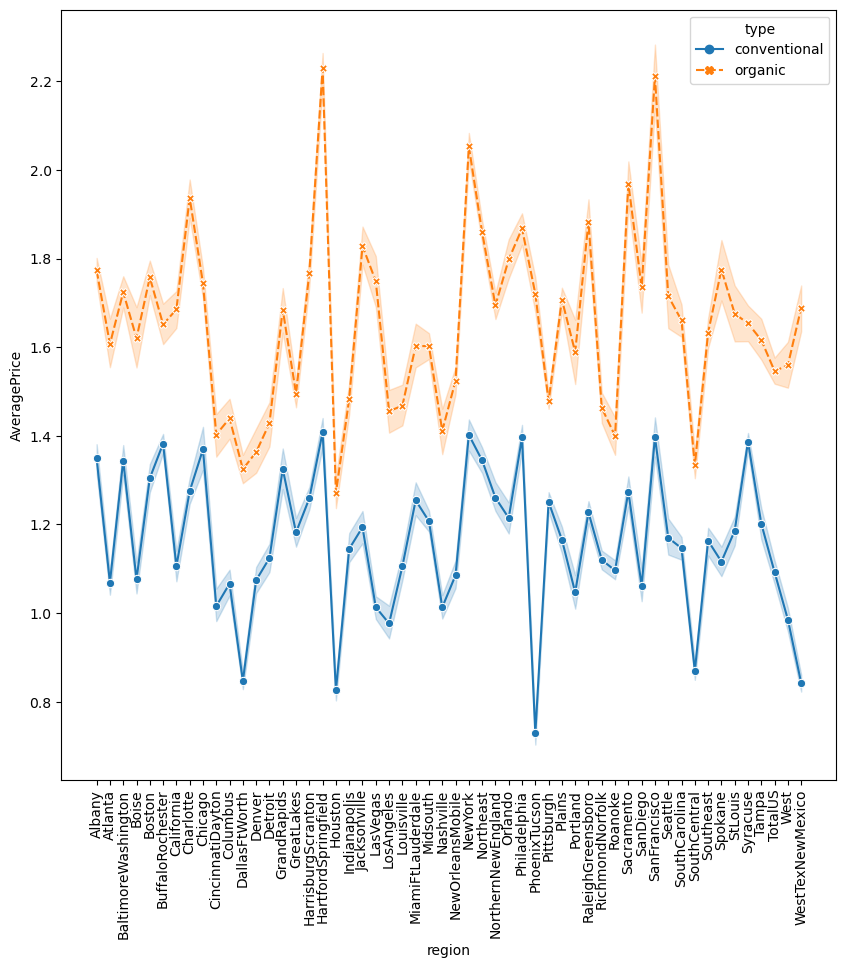

In [184]:
plt.figure(figsize=(10,10))
sns.lineplot(x="region", y="AveragePrice", hue='type', data=df, markers =True, style = 'type')
plt.xticks(rotation=90)
plt.show()

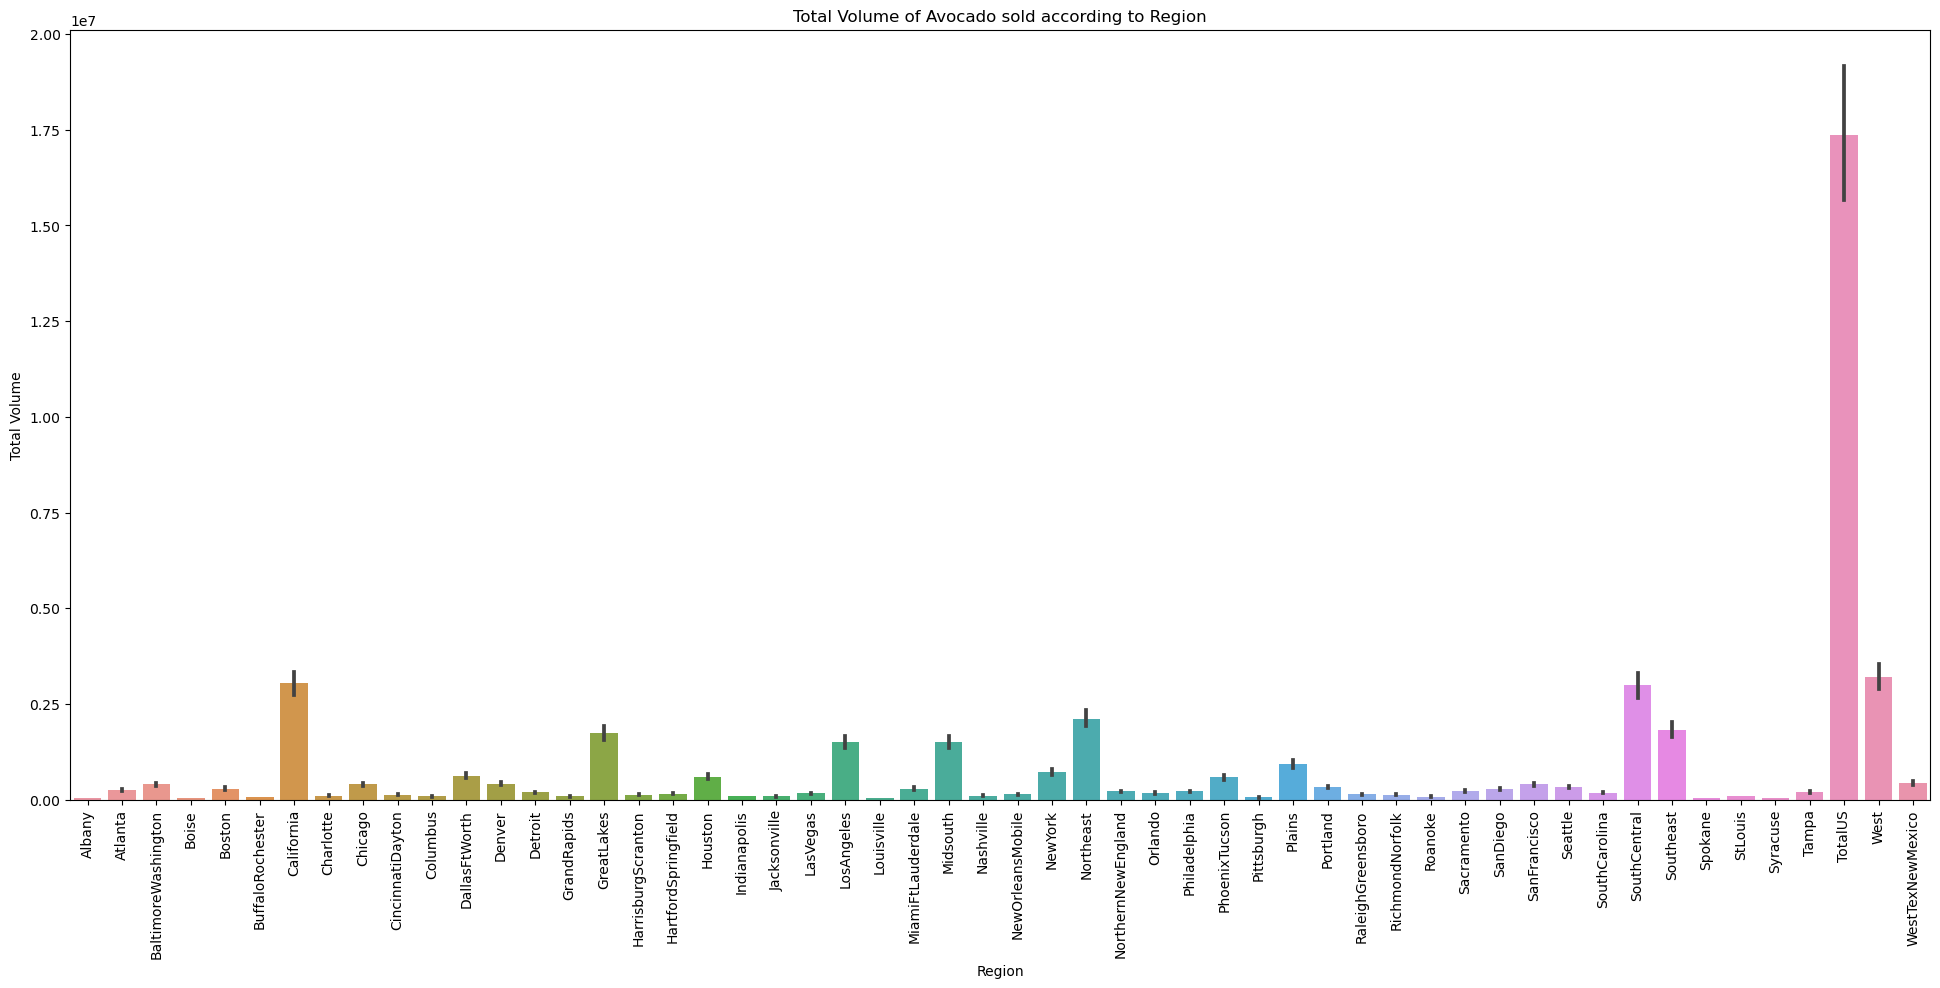

In [185]:
#total volume v/s region
plt.figure(figsize=(24,10))
ax=sns.barplot(x='region',y='Total Volume', data=df)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume of Avocado sold according to Region')
plt.show()

We see the highest sales is done in TotalUs and very least avocados were sold in Albany, Boise,Louisville,Pittsburgh,Spokane,Syracuse.

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

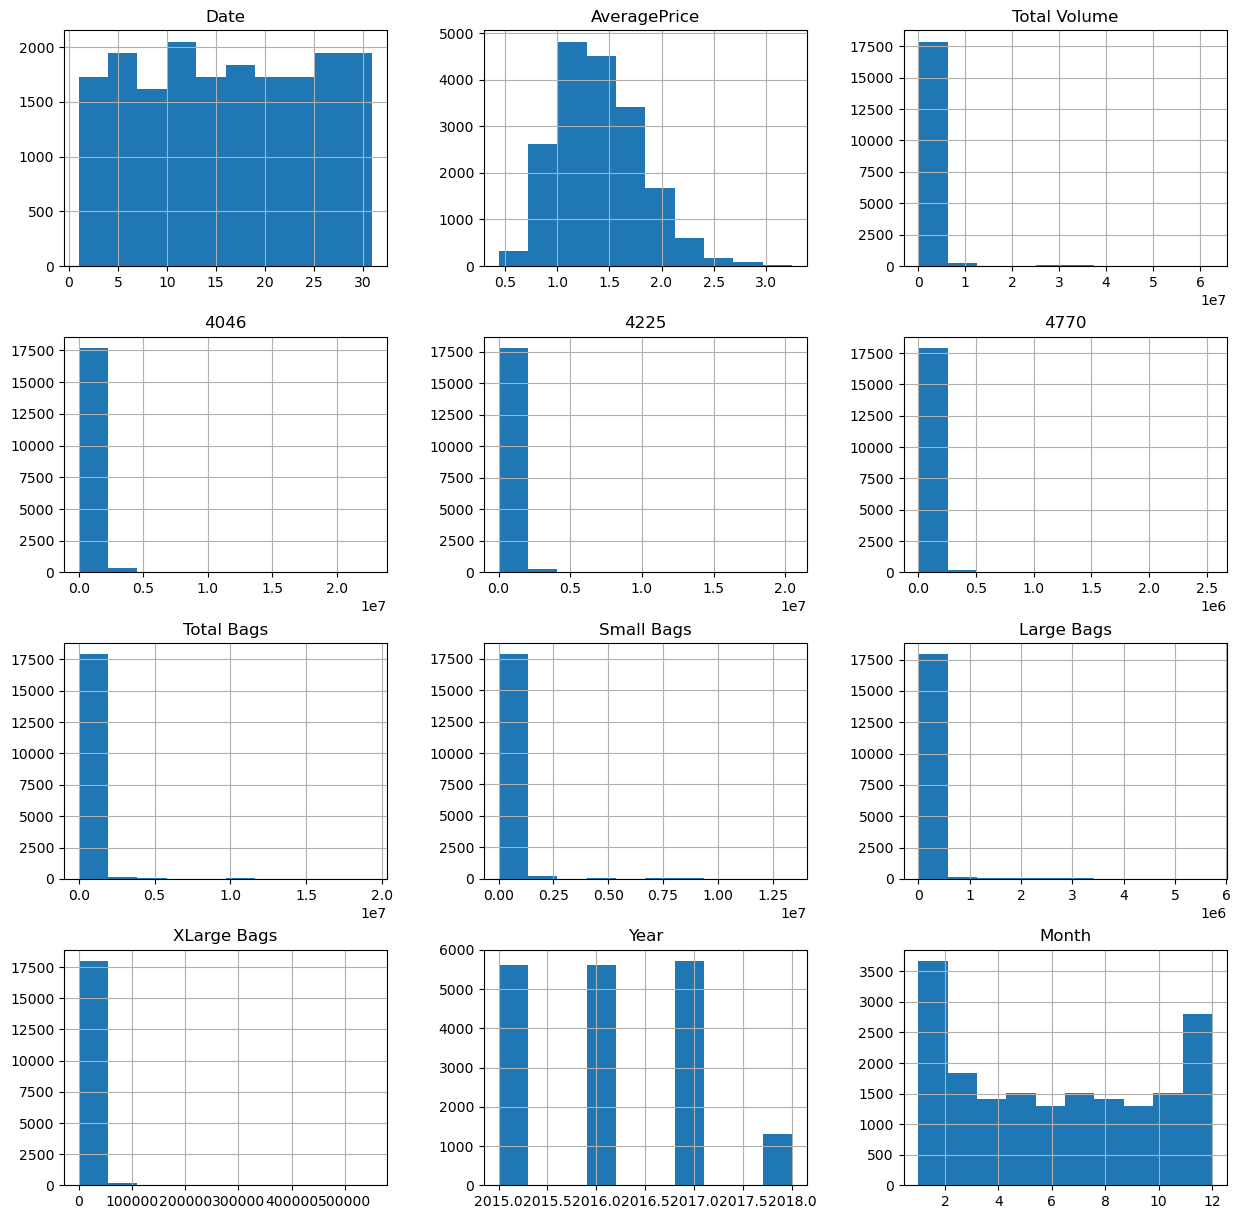

In [186]:
df.hist(figsize = (15,15))

We see there is skewness in all most all the columns except date, average price, year and month columns

In [188]:
df.skew()

Date             0.014310
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
Month            0.106617
dtype: float64

We see there is huge skewness in most of the columns, so we will reduce the skewness and check for outliers

In [189]:
from scipy.stats import boxcox, yeojohnson

In [190]:
df['Total Volume'] = boxcox(df['Total Volume'])[0]

In [191]:
df['4046'] = yeojohnson(df['4046'])[0]

In [192]:
df['4225'] = yeojohnson(df['4225'])[0]

In [193]:
df['4770'] = yeojohnson(df['4770'])[0]

In [194]:
df['Total Bags'] = yeojohnson(df['Total Bags'])[0]

In [195]:
df['Small Bags'] = yeojohnson(df['Small Bags'])[0]

In [196]:
df['Large Bags'] = yeojohnson(df['Large Bags'])[0]

In [197]:
df['XLarge Bags'] = yeojohnson(df['XLarge Bags'])[0]

In [198]:
df.skew()

Date            0.014310
AveragePrice    0.580303
Total Volume    0.011149
4046           -0.022679
4225           -0.017740
4770            0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
Year            0.215339
Month           0.106617
dtype: float64

We see that the skewness is been removed, next we will check for the outliers, and will remove the outliers before that we will encode the data in object to numerical

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,27,1.33,10.021172,7.995299,15.607628,3.769413,10.555053,12.723064,5.377630,-0.0,0,0,2015,12
1,20,1.35,9.892382,7.434186,15.218177,3.945166,10.674730,12.893882,5.438759,-0.0,0,0,2015,12
2,13,0.93,10.516534,7.647351,17.008594,4.682910,10.467091,12.594828,5.516526,-0.0,0,0,2015,12
3,6,1.08,10.189714,8.111170,16.162407,4.145679,10.016719,11.942806,5.879964,-0.0,0,0,2015,12
4,29,1.28,9.832972,7.868726,15.182964,4.185248,10.099275,12.040958,6.440275,-0.0,0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,8.925925,8.902814,9.293367,-0.000000,11.150199,13.531103,7.612289,-0.0,1,53,2018,2
18245,28,1.71,8.752758,8.179107,10.601209,-0.000000,10.640169,12.796233,7.177024,-0.0,1,53,2018,1
18246,21,1.87,8.745391,8.179351,10.049841,6.237057,10.658835,12.882384,4.328793,-0.0,1,53,2018,1
18247,14,1.93,8.882169,8.509370,10.368714,6.235915,10.868272,13.181029,4.544410,-0.0,1,53,2018,1


Now, we see that the dataset has been encoded. next will check for outliers.

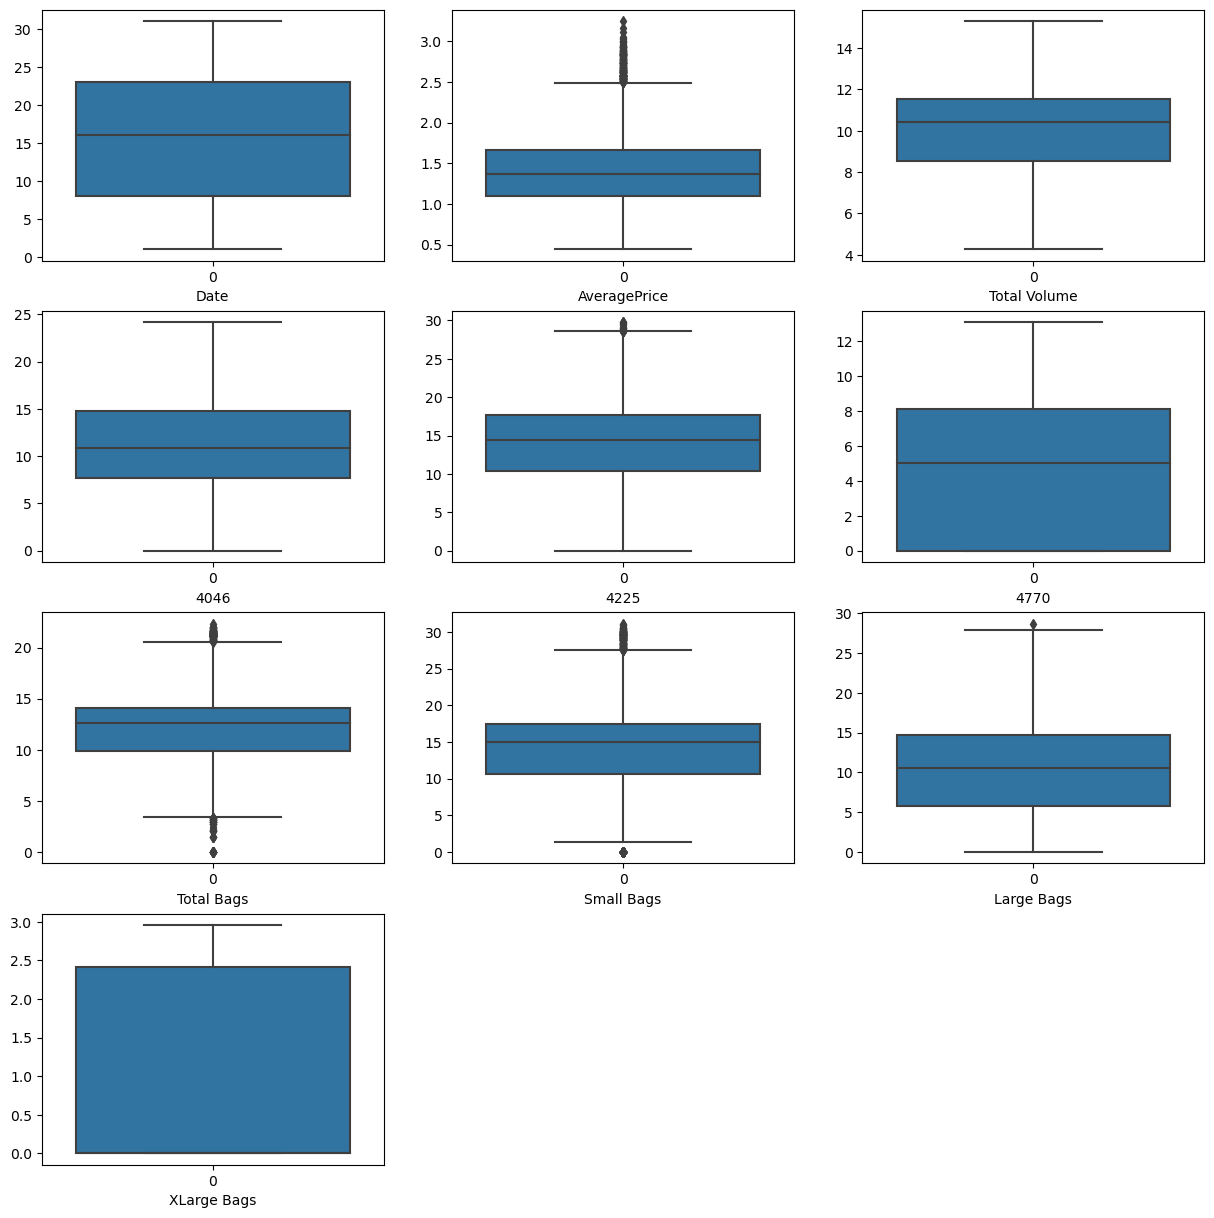

In [203]:
#plot BoxPlot
plt.figure(figsize =(15,15), facecolor = 'white')
num = 1
for column in df:
    if num <=10:
        plt.subplot(4,3,num)
        sns.boxplot(data = df[column])
        plt.xlabel(column,fontsize = 10)
        
    num +=1
plt.show()

In [204]:
from scipy.stats import zscore
z = np.abs(zscore(df))
np.where(z>3) #threshold = 3
z_df=df[(z<3).all(axis=1)]
print(z_df.shape)
print("data_loss =   ", ((df.shape[0]-z_df.shape[0])/df.shape[0])*100)

(18025, 14)
data_loss =    1.2274645186037592


In [205]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3-q1

iqr_df = df[~((df <(q1 - 1.5*iqr))| (df>(q3+1.5*iqr))).any(axis=1)]
print(iqr_df.shape)
print("data_loss =   ", ((df.shape[0]-iqr_df.shape[0])/df.shape[0])*100)

(17704, 14)
data_loss =    2.9864650117814673


we see only very less data is lost in both methods and when we compare both methods the least one is using z_score method, so we consider data after removing outliers using z_score method

In [207]:
df=z_df

In [208]:
df.corr()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
Date,1.000000,0.029210,-0.009657,-0.008091,-0.009686,-0.001636,-0.006057,-0.003533,-0.002907,0.007110,-0.000497,-0.000791,0.005470,0.012458
AveragePrice,0.029210,1.000000,-0.587474,-0.560090,-0.464006,-0.505443,-0.573823,-0.497878,-0.494091,-0.407944,0.619066,-0.021334,0.088993,0.153350
Total Volume,-0.009657,-0.587474,1.000000,0.894831,0.925991,0.828219,0.945402,0.906062,0.699299,0.649900,-0.799011,0.100162,0.086436,-0.025849
4046,-0.008091,-0.560090,0.894831,1.000000,0.779911,0.752608,0.813202,0.789016,0.624886,0.598327,-0.726557,0.188151,0.008854,-0.025872
4225,-0.009686,-0.464006,0.925991,0.779911,1.000000,0.807439,0.828839,0.789930,0.641989,0.607093,-0.745743,0.067523,0.005092,-0.025167
4770,-0.001636,-0.505443,0.828219,0.752608,0.807439,1.000000,0.775915,0.765687,0.572876,0.638758,-0.783578,0.067713,-0.043664,-0.018199
Total Bags,-0.006057,-0.573823,0.945402,0.813202,0.828839,0.775915,1.000000,0.948215,0.742157,0.635949,-0.727316,0.108019,0.213088,-0.014974
Small Bags,-0.003533,-0.497878,0.906062,0.789016,0.789930,0.765687,0.948215,1.000000,0.585225,0.624077,-0.718641,0.091399,0.189244,-0.010295
Large Bags,-0.002907,-0.494091,0.699299,0.624886,0.641989,0.572876,0.742157,0.585225,1.000000,0.482181,-0.509992,0.125861,0.187400,-0.017904
XLarge Bags,0.007110,-0.407944,0.649900,0.598327,0.607093,0.638758,0.635949,0.624077,0.482181,1.000000,-0.672088,0.006619,0.162982,0.014430


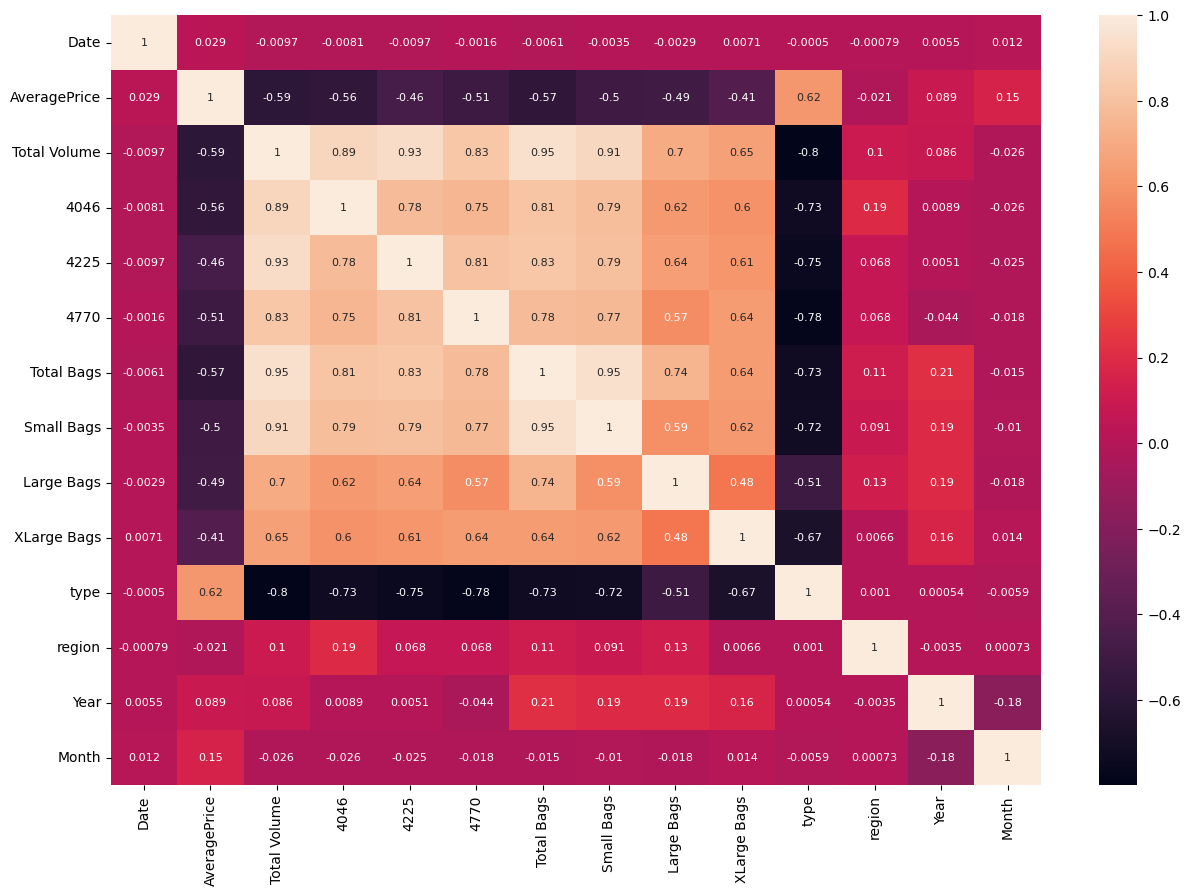

In [210]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot=True,annot_kws ={'size':8})
plt.show()

we see that features  like 4046, 4225, 4770,Total bags, small bags, large bags  are highly correlated with total volume. Our targets Average price is having slight correlation with type, and Region is not having such highly correlation with any of the features but its positively correlated with almost all the features

### Average Price Prediction

#### Standard Scaler

In [211]:
avg_x = df.drop(columns = ['AveragePrice'], axis = 1)
avg_y = df['AveragePrice']

In [212]:
avg_x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,27,10.021172,7.995299,15.607628,3.769413,10.555053,12.723064,5.377630,-0.0,0,0,2015,12
1,20,9.892382,7.434186,15.218177,3.945166,10.674730,12.893882,5.438759,-0.0,0,0,2015,12
2,13,10.516534,7.647351,17.008594,4.682910,10.467091,12.594828,5.516526,-0.0,0,0,2015,12
3,6,10.189714,8.111170,16.162407,4.145679,10.016719,11.942806,5.879964,-0.0,0,0,2015,12
4,29,9.832972,7.868726,15.182964,4.185248,10.099275,12.040958,6.440275,-0.0,0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,8.925925,8.902814,9.293367,-0.000000,11.150199,13.531103,7.612289,-0.0,1,53,2018,2
18245,28,8.752758,8.179107,10.601209,-0.000000,10.640169,12.796233,7.177024,-0.0,1,53,2018,1
18246,21,8.745391,8.179351,10.049841,6.237057,10.658835,12.882384,4.328793,-0.0,1,53,2018,1
18247,14,8.882169,8.509370,10.368714,6.235915,10.868272,13.181029,4.544410,-0.0,1,53,2018,1


In [356]:
avg_y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18025, dtype: float64

In [357]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
x = pd.DataFrame(sr.fit_transform(avg_x), columns = avg_x.columns)
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.292209,-0.086586,-0.662165,0.315657,-0.249098,-0.540823,-0.349220,-0.780341,-0.699248,-0.994964,-1.695233,-1.216044,1.647567
1,0.494329,-0.156526,-0.781564,0.239177,-0.202628,-0.501663,-0.314201,-0.770300,-0.699248,-0.994964,-1.695233,-1.216044,1.647567
2,-0.303552,0.182424,-0.736205,0.590777,-0.007562,-0.569605,-0.375509,-0.757526,-0.699248,-0.994964,-1.695233,-1.216044,1.647567
3,-1.101432,0.004942,-0.637508,0.424603,-0.149610,-0.716973,-0.509178,-0.697830,-0.699248,-0.994964,-1.695233,-1.216044,1.647567
4,1.520175,-0.188789,-0.689098,0.232261,-0.139148,-0.689959,-0.489057,-0.605796,-0.699248,-0.994964,-1.695233,-1.216044,1.365031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18020,-1.329398,-0.681367,-0.469054,-0.924331,-1.245762,-0.346083,-0.183567,-0.413286,-0.699248,1.005061,1.716860,1.973748,-1.177797
18021,1.406192,-0.775406,-0.623052,-0.667499,-1.245762,-0.512971,-0.334220,-0.484781,-0.699248,1.005061,1.716860,1.973748,-1.460333
18022,0.608312,-0.779406,-0.623000,-0.775776,0.403367,-0.506864,-0.316558,-0.952617,-0.699248,1.005061,1.716860,1.973748,-1.460333
18023,-0.189569,-0.705128,-0.552775,-0.713156,0.403065,-0.438333,-0.255334,-0.917201,-0.699248,1.005061,1.716860,1.973748,-1.460333


### Model Building

In [358]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [359]:
accuracy = 0
r_state =0
for i in range(1,200):
    x_train_avg,x_test_avg,y_train_avg,y_test_avg = train_test_split(x, avg_y, test_size = 0.25, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train_avg,y_train_avg)
    y_pred = lr.predict(x_test_avg)
    acc = r2_score(y_test_avg,y_pred)
    if acc>accuracy:
        accuracy=acc
        r_state = i
print("maximum r2 score is ", accuracy , "at randomstate = ",r_state)

maximum r2 score is  0.5922061319191514 at randomstate =  164


In [360]:
x_train_avg,x_test_avg,y_train_avg,y_test_avg = train_test_split(x, avg_y, test_size = 0.25, random_state = 164)

In [361]:
x_train_avg.shape

(13518, 13)

In [363]:
y_train_avg.shape

(13518,)

In [364]:
x_test_avg.shape

(4507, 13)

In [365]:
y_test_avg.shape

(4507,)

In [366]:
model=[LinearRegression(), Lasso(), Ridge(), GradientBoostingRegressor(), AdaBoostRegressor(), RandomForestRegressor(), 
       ExtraTreesRegressor(), DecisionTreeRegressor(), KNN(), SVR()]
for i in model:
    print("*" *60)
    print('accuracy score of : ',i)
    i.fit(x_train_avg,y_train_avg)
    pred = i.predict(x_test_avg)
    
    print("R2 Score:                ", r2_score(y_test_avg,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y_test_avg,pred))
    print("Mean Squared Error:      ", mean_squared_error(y_test_avg,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test_avg,pred)))
    cross_score=cross_val_score(i,x,avg_y,cv=5)
    print(cross_score)
    
    print("Cross Validation Score:  ",np.mean(cross_score))
    print("Difference between R2 score and Cross Validation Score is :  ", r2_score(y_test_avg,pred)-cross_score.mean())
    print("*" *60)
    print("\n")

************************************************************
accuracy score of :  LinearRegression()
R2 Score:                 0.5922061319191514
Mean Absolute Error:      0.19763520549069225
Mean Squared Error:       0.06264942298769809
Root Mean Squared Error:  0.2502986675707605
[-0.1637519   0.26795128  0.49633059  0.21157735  0.30072561]
Cross Validation Score:   0.2225665877350645
Difference between R2 score and Cross Validation Score is :   0.3696395441840869
************************************************************


************************************************************
accuracy score of :  Lasso()
R2 Score:                 -2.864941799796128e-06
Mean Absolute Error:      0.3211452517533427
Mean Squared Error:       0.15363056528900018
Root Mean Squared Error:  0.39195735136491594
[-3.77450586 -0.70894878 -0.0286188  -0.51454311 -0.83628   ]
Cross Validation Score:   -1.1725793106450468
Difference between R2 score and Cross Validation Score is :   1.172576445703247
**

1. Linear - R2 Score: 0.59220             CV diff:  0.36963
2. Lasso  - R2 Score: -2.8649             CV diff:  1.17259
3. Ridge  - R2 Score: 0.59219             CV diff:  0.36960
4. GradientBoosting - R2 Score: 0.76362   CV diff:  0.37379
5. AdaBoost - R2 Score: 0.59418           CV diff:  0.54077
6. RandomForest - R2 Score: 0.89680       CV diff:  0.68744
7. ExtraTrees -   R2 Score: 0.91857       CV diff:  0.60902
8. DecisionTree - R2 Score: 0.75323       CV diff:  1.08165
9. KNN Regressor- r2 Score: 0.81563       CV diff:  0.74630
10. SVR      - R2 Score: 0.80444          CV diff:  0.68631

we see that GradientBoosting Regressor is having least difference and also better r2 score, so we will tune parameters for GradientBoosting model, so that we can increase the r2 score and get better result. 

### Hyper Parameter Tuning

In [367]:
param_grid_gbr = {"n_estimators": [30,32,38], "learning_rate" :[0.001,0.01, 0.1], 
                  "max_depth":[8,10,12,14],"criterion":['friedman_mse','squared_error'],"max_features":['sqrt','log2']}

In [368]:
gd_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5)
gd_gbr.fit(x_train_avg,y_train_avg)


best_parameters=gd_gbr.best_params_
print(best_parameters)
best_result=gd_gbr.best_score_
print(best_result*100)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 38}
88.21398955266491


In [379]:
avocado_price = GradientBoostingRegressor(criterion='friedman_mse', learning_rate=0.1, max_depth=12, max_features='sqrt', n_estimators=110)

In [380]:
avocado_price.fit(x_train_avg,y_train_avg)
avocado_price_pred = avocado_price.predict(x_test_avg)
avocado_price_r2 = r2_score(y_test_avg, avocado_price_pred)
avocado_price_mae = mean_absolute_error(y_test_avg, avocado_price_pred)
avocado_price_mse = mean_squared_error(y_test_avg, avocado_price_pred)
avocado_price_rmse = np.sqrt(mean_squared_error(y_test_avg, avocado_price_pred))

print("r2Score of test data is  ",avocado_price_r2)
print("Mean absolute error of test data is  ", avocado_price_mae)
print("Mean squared error of test data is  ", avocado_price_mse)
print("Root Mean squared error of test data is  ", avocado_price_rmse)
print("\n")

r2Score of test data is   0.9135882485536924
Mean absolute error of test data is   0.08205708964442954
Mean squared error of test data is   0.013275448188922404
Root Mean squared error of test data is   0.11521913117587029




We see that after tuning the parameters there is increase in r2 score from 76 % to 91%. MAE, MSE, RMSE ahve also been reduced. so, we consider Gradient boosting regression as the best and accurate model 

,Actual,Predicted
9701,1.48,1.482202
6499,1.48,1.477127
14789,1.86,1.706310
6401,1.50,1.559415
17279,1.09,1.381284
14630,1.37,1.366762
3255,1.11,1.096904
14111,1.32,1.385060
14337,2.13,1.645129
4750,1.29,1.239401


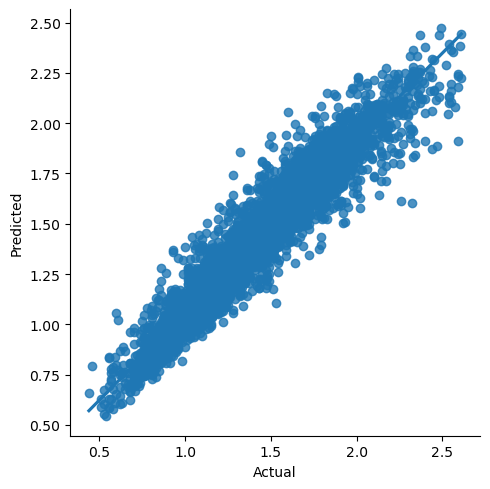

In [381]:
avocado_price_df = pd.DataFrame({'Actual':y_test_avg , 'Predicted':avocado_price_pred},columns=['Actual','Predicted'])
sns.lmplot(x='Actual',y='Predicted', data=avocado_price_df)
avocado_price_df.sample(25)

### save the model

In [382]:
import joblib

In [383]:
joblib.dump(avocado_price, "Avocado_price_prediction.pkl")

['Avocado_price_prediction.pkl']

In [384]:
final_model = joblib.load("Avocado_price_prediction.pkl")
result = final_model.score(x_test_avg,y_test_avg)
print(result)

0.9135882485536924


### Region Prediction

In [278]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,27,1.33,10.021172,7.995299,15.607628,3.769413,10.555053,12.723064,5.377630,-0.0,0,0,2015,12
1,20,1.35,9.892382,7.434186,15.218177,3.945166,10.674730,12.893882,5.438759,-0.0,0,0,2015,12
2,13,0.93,10.516534,7.647351,17.008594,4.682910,10.467091,12.594828,5.516526,-0.0,0,0,2015,12
3,6,1.08,10.189714,8.111170,16.162407,4.145679,10.016719,11.942806,5.879964,-0.0,0,0,2015,12
4,29,1.28,9.832972,7.868726,15.182964,4.185248,10.099275,12.040958,6.440275,-0.0,0,0,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,8.925925,8.902814,9.293367,-0.000000,11.150199,13.531103,7.612289,-0.0,1,53,2018,2
18245,28,1.71,8.752758,8.179107,10.601209,-0.000000,10.640169,12.796233,7.177024,-0.0,1,53,2018,1
18246,21,1.87,8.745391,8.179351,10.049841,6.237057,10.658835,12.882384,4.328793,-0.0,1,53,2018,1
18247,14,1.93,8.882169,8.509370,10.368714,6.235915,10.868272,13.181029,4.544410,-0.0,1,53,2018,1


In [279]:
reg_x = df.drop(columns = ['region'], axis = 1)
reg_y = df['region']

In [280]:
reg_x.shape

(18025, 13)

In [281]:
reg_y.shape

(18025,)

### Standard Scaler

In [282]:
from sklearn.preprocessing import StandardScaler
sr = StandardScaler()
x1 = pd.DataFrame(sr.fit_transform(reg_x), columns = reg_x.columns)
x1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,Year,Month
0,1.292209,-0.172764,-0.086586,-0.662165,0.315657,-0.249098,-0.540823,-0.349220,-0.780341,-0.699248,-0.994964,-1.216044,1.647567
1,0.494329,-0.120997,-0.156526,-0.781564,0.239177,-0.202628,-0.501663,-0.314201,-0.770300,-0.699248,-0.994964,-1.216044,1.647567
2,-0.303552,-1.208102,0.182424,-0.736205,0.590777,-0.007562,-0.569605,-0.375509,-0.757526,-0.699248,-0.994964,-1.216044,1.647567
3,-1.101432,-0.819850,0.004942,-0.637508,0.424603,-0.149610,-0.716973,-0.509178,-0.697830,-0.699248,-0.994964,-1.216044,1.647567
4,1.520175,-0.302181,-0.188789,-0.689098,0.232261,-0.139148,-0.689959,-0.489057,-0.605796,-0.699248,-0.994964,-1.216044,1.365031
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18020,-1.329398,0.603740,-0.681367,-0.469054,-0.924331,-1.245762,-0.346083,-0.183567,-0.413286,-0.699248,1.005061,1.973748,-1.177797
18021,1.406192,0.810808,-0.775406,-0.623052,-0.667499,-1.245762,-0.512971,-0.334220,-0.484781,-0.699248,1.005061,1.973748,-1.460333
18022,0.608312,1.224943,-0.779406,-0.623000,-0.775776,0.403367,-0.506864,-0.316558,-0.952617,-0.699248,1.005061,1.973748,-1.460333
18023,-0.189569,1.380244,-0.705128,-0.552775,-0.713156,0.403065,-0.438333,-0.255334,-0.917201,-0.699248,1.005061,1.973748,-1.460333


### Model Building

In [283]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [284]:
accuracy = 0
r_state = 0
for i in range(1,100):
    x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(x1, reg_y, test_size = 0.25, random_state = i)
    log = LogisticRegression()
    log.fit(x_train_reg,y_train_reg)
    y_pred_reg = log.predict(x_test_reg)
    acc = accuracy_score(y_test_reg,y_pred_reg)
    if acc>accuracy:
        accuracy = acc
        r_state = i
print("max accuracy score : ", accuracy,"at the random state: " , r_state)

max accuracy score :  0.5553583314843576 at the random state:  64


In [285]:
x_train_reg,x_test_reg,y_train_reg,y_test_reg = train_test_split(x1, reg_y, test_size = 0.25, random_state = 64)

In [286]:
x_train_reg.shape

(13518, 13)

In [287]:
y_train_reg.shape

(13518,)

In [288]:
x_test_reg.shape

(4507, 13)

In [289]:
y_test_reg.shape

(4507,)

In [290]:
log = LogisticRegression()
log.fit(x_train_reg,y_train_reg)
log_pred = log.predict(x_test_reg)
log_pred_train = log.predict(x_train_reg)
print("Logistic Regression")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, log_pred_train)*100, "%")
log_accu = accuracy_score(y_test_reg, log_pred) 
print("Accuracy of test data is  ", (log_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg,log_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg,log_pred))
print("****************************************")
print("\n")

rfc = RandomForestClassifier()
rfc.fit(x_train_reg,y_train_reg)
rfc_pred = rfc.predict(x_test_reg)
rfc_pred_train = rfc.predict(x_train_reg)
print("Random Forest Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, rfc_pred_train)*100, "%")
rfc_accu = accuracy_score(y_test_reg, rfc_pred) 
print("Accuracy of test data is  ", (rfc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg,rfc_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg,rfc_pred))
print("****************************************")
print("\n")

bc = BaggingClassifier()
bc.fit(x_train_reg,y_train_reg)
bc_pred = bc.predict(x_test_reg)
bc_pred_train = bc.predict(x_train_reg)
print("Bagging Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, bc_pred_train)*100, "%")
bc_accu = accuracy_score(y_test_reg, bc_pred)
print("Accuracy of test data is  ", (bc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg,bc_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg,bc_pred))
print("****************************************")
print("\n")

abc = AdaBoostClassifier()
abc.fit(x_train_reg,y_train_reg)
abc_pred = abc.predict(x_test_reg)
abc_pred_train = abc.predict(x_train_reg)
print("AdaBoost Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, abc_pred_train)*100, "%")
abc_accu = accuracy_score(y_test_reg, abc_pred)
print("Accuracy of test data is  ", (abc_accu) *100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg,abc_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg,abc_pred))
print("****************************************")
print("\n")

gbc = GradientBoostingClassifier()
gbc.fit(x_train_reg,y_train_reg)
gbc_pred = gbc.predict(x_test_reg)
gbc_pred_train = gbc.predict(x_train_reg)
print("Gradient Boosting Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, gbc_pred_train)*100, "%")
gbc_accu = accuracy_score(y_test_reg, gbc_pred) 
print("Accuracy of test data is  ", (gbc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg,gbc_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg,gbc_pred))
print("****************************************")
print("\n")

etc = ExtraTreesClassifier()
etc.fit(x_train_reg,y_train_reg)
etc_pred = etc.predict(x_test_reg)
etc_pred_train = etc.predict(x_train_reg)
print("Extra Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, etc_pred_train)*100, "%")
etc_accu = accuracy_score(y_test_reg, etc_pred) 
print("Accuracy of test data is  ", (etc_accu)*100, "%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg,etc_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg,etc_pred))
print("****************************************")
print("\n")

dtc = DecisionTreeClassifier()
dtc.fit(x_train_reg,y_train_reg)
dtc_pred = dtc.predict(x_test_reg)
dtc_pred_train = dtc.predict(x_train_reg)
print("Decision Trees Classifier")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, dtc_pred_train)*100, "%")
dtc_accu = accuracy_score(y_test_reg, dtc_pred) 
print("Accuracy of test data is  ", (dtc_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg,dtc_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg,dtc_pred))
print("****************************************")
print("\n")

knn = KNeighborsClassifier()
knn.fit(x_train_reg,y_train_reg)
knn_pred = knn.predict(x_test_reg)
knn_pred_train = knn.predict(x_train_reg)
print("K-Nearest Neighbors")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, knn_pred_train)*100, "%")
knn_accu = accuracy_score(y_test_reg, knn_pred) 
print("Accuracy of test data is  ", (knn_accu)*100 ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg, knn_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg, knn_pred))
print("****************************************")
print("\n")


svc = SVC()
svc.fit(x_train_reg,y_train_reg)
svc_pred = svc.predict(x_test_reg)
svc_pred_train = svc.predict(x_train_reg)
print("Super-Vector Classification")
print("Accuracy of train data is  ",accuracy_score(y_train_reg, svc_pred_train)*100 , "%")
svc_accu = accuracy_score(y_test_reg, svc_pred) 
print("Accuracy of test data is  ", (svc_accu)*100,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg, svc_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg, svc_pred))
print("****************************************")
print("\n")


Logistic Regression
Accuracy of train data is   55.57035064358633 %
Accuracy of test data is   55.53583314843576 %

 Confusion Matrix [[57  0  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 [ 0  0 43 ...  0  0 10]
 ...
 [ 0  0  0 ... 57  1  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  2  2 ...  0  0 15]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.64      0.69      0.66        83
           1       0.23      0.32      0.27        90
           2       0.67      0.61      0.64        71
           3       0.51      0.39      0.44        84
           4       0.48      0.52      0.50        88
           5       0.54      0.49      0.51        78
           6       0.84      0.92      0.88        78
           7       0.67      0.67      0.67        94
           8       0.71      0.84      0.77        87
           9       0.62      0.87      0.73        86
          10       0.43      0.49      0.46        75
          11       0.58      0

AdaBoost Classifier
Accuracy of train data is   7.160822606894511 %
Accuracy of test data is   7.0335034390947415 %

 Confusion Matrix [[ 0  0  0 ...  0  0  0]
 [ 0 36  0 ...  0  0  0]
 [ 0  0 33 ...  0  0  0]
 ...
 [ 0  0 12 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.11      0.40      0.18        90
           2       0.10      0.46      0.16        71
           3       0.00      0.00      0.00        84
           4       0.23      0.23      0.23        88
           5       0.00      0.00      0.00        78
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00        94
           8       0.00      0.00      0.00        87
           9       0.00      0.00      0.00        86
          10       0.00      0.00      0.00        75
          11       0.00      

Decision Trees Classifier
Accuracy of train data is   100.0 %
Accuracy of test data is   79.21011759485245 %

 Confusion Matrix [[66  0  0 ...  0  0  0]
 [ 0 69  0 ...  0  0  2]
 [ 0  0 63 ...  0  0  1]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  1 75  0]
 [ 0  0  2 ...  0  0 56]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        83
           1       0.77      0.77      0.77        90
           2       0.89      0.89      0.89        71
           3       0.81      0.70      0.75        84
           4       0.85      0.84      0.85        88
           5       0.77      0.74      0.76        78
           6       0.93      0.95      0.94        78
           7       0.89      0.67      0.76        94
           8       0.93      0.91      0.92        87
           9       0.85      0.79      0.82        86
          10       0.60      0.60      0.60        75
          11       0.81      0.84   

In [296]:
Accuracy = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'Accuracy_score':[log_accu, rfc_accu, bc_accu,abc_accu,gbc_accu,etc_accu,dtc_accu,knn_accu,svc_accu]
                        })
Accuracy


,Models,Accuracy_score
0,Logistic,0.555358
1,RandomForest Classifier,0.910805
2,Bagging Classifier,0.852230
3,AdaBoost Classifier,0.070335
4,GradientBoosting,0.835811
5,ExtraTreesClassifier,0.921899
6,DecisionTree,0.792101
7,Knn,0.637675
8,svc,0.794986


### Cross-Validation Score

In [295]:
print('\n Logistic Regression \n')
log_score = cross_val_score(log, x1, reg_y, cv=3)
print(log_score)
print(np.mean(log_score))
log_diff = (log_accu - log_score.mean())
print(log_diff)
print("====================================\n ")


print('\n Random Forest Classifier \n')
rfc_score = cross_val_score(rfc, x1, reg_y, cv=3)
print(rfc_score)
print(np.mean(rfc_score))
rfc_diff = (rfc_accu - rfc_score.mean())
print(rfc_diff)
print("====================================\n ")


print('\n Bagging Classifier \n')
bc_score = cross_val_score(bc, x1,reg_y, cv=3)
print(bc_score)
print(np.mean(bc_score))
bc_diff = (bc_accu - bc_score.mean())
print(bc_diff)
print("====================================\n ")


print('\n AdaBoost Classifier \n')
abc_score = cross_val_score(abc, x1, reg_y, cv=3)
print(abc_score)
print(np.mean(abc_score))
abc_diff = (abc_accu - abc_score.mean())
print(abc_diff)
print("====================================\n ")


print('\n ExtraTrees Classifier \n')
etc_score = cross_val_score(etc, x1, reg_y, cv=3)
print(etc_score)
print(np.mean(etc_score))
etc_diff = (etc_accu - etc_score.mean())
print(etc_diff)
print("====================================\n ")

print('\n DecisionTree Classifier \n')
dtc_score = cross_val_score(dtc, x1, reg_y, cv=3)
print(dtc_score)
print(np.mean(dtc_score))
dtc_diff = (dtc_accu - dtc_score.mean())
print(dtc_diff)
print("====================================\n ")

print('\n K-Neighbors Classifier \n')
knn_score = cross_val_score(knn, x1, reg_y, cv=3)
print(knn_score)
print(np.mean(knn_score))
knn_diff = (knn_accu - knn_score.mean())
print(knn_diff)
print("====================================\n ")

print('\n Super Vector Classifier \n')
svc_score = cross_val_score(svc, x1, reg_y, cv=3)
print(svc_score)
print(np.mean(svc_score))
svc_diff = (svc_accu - svc_score.mean())
print(svc_diff)
print("====================================\n ")

print('\n Gradient Boosting Classifier \n')
gbc_score = cross_val_score(gbc, x1, reg_y, cv=3)
print(gbc_score)
print(np.mean(gbc_score))
gbc_diff = (gbc_accu - gbc_score.mean())
print(gbc_diff)
print("====================================\n ")



 Logistic Regression 

[0.20569146 0.39813582 0.27180426]
0.29187718089975556
0.2634811505846021
 

 Random Forest Classifier 

[0.58229323 0.63099201 0.42093875]
0.5447413286048143
0.36606408519594014
 

 Bagging Classifier 

[0.53286737 0.58189081 0.40462716]
0.5064617805500656
0.34576808410491555
 

 AdaBoost Classifier 

[0.0234648  0.06607856 0.0349534 ]
0.04149892006198425
0.028836114328963165
 

 ExtraTrees Classifier 

[0.59810285 0.64447403 0.45206391]
0.5648802650440673
0.3570190027615684
 

 DecisionTree Classifier 

[0.45947745 0.48069241 0.34720373]
0.4291245296576514
0.36297664629087306
 

 K-Neighbors Classifier 

[0.32451323 0.3876498  0.26231691]
0.3248266470688996
0.31284808113167734
 

 Super Vector Classifier 

[0.41238143 0.5238016  0.30559254]
0.4139251896677842
0.38106038832200945
 

 Gradient Boosting Classifier 

[0.46513563 0.57723036 0.34171105]
0.4613590137799662
0.37445194694779066
 


In [297]:
CV_data = pd.DataFrame({'Models':['Logistic', 'RandomForest Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'GradientBoosting','ExtraTreesClassifier','DecisionTree', 'Knn','svc'],
                          'Diff_score':[log_diff, rfc_diff, bc_diff,abc_diff,gbc_diff,etc_diff,dtc_diff,knn_diff,svc_diff]
                        })
CV_data

,Models,Diff_score
0,Logistic,0.263481
1,RandomForest Classifier,0.366064
2,Bagging Classifier,0.345768
3,AdaBoost Classifier,0.028836
4,GradientBoosting,0.374452
5,ExtraTreesClassifier,0.357019
6,DecisionTree,0.362977
7,Knn,0.312848
8,svc,0.381060


We see that Ada Boost classifier logistic regression and Knn classifiers are least difference but accuracy is high with knn compared to ada boost and logistic regression, so we will tune parameters for knn model.

In [298]:
param_grid_reg = {"n_neighbors":[20,23,28,30,31,32],"weights":['uniform', 'distance'], 
              "algorithm": ['auto','kd_tree','ball_tree','brute'],"leaf_size": [10,12,15,18,20]}

In [299]:
knn_reg = GridSearchCV(KNeighborsClassifier(), param_grid_reg, cv=3)
knn_reg.fit(x_train_reg,y_train_reg)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute'],
                         'leaf_size': [10, 12, 15, 18, 20],
                         'n_neighbors': [20, 23, 28, 30, 31, 32],
                         'weights': ['uniform', 'distance']})

In [300]:
best_parameters=knn_reg.best_params_
print(best_parameters)
best_result=knn_reg.best_score_
print(best_result*100)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 20, 'weights': 'distance'}
56.74656014203284


In [342]:
avocado_region = KNeighborsClassifier(algorithm='auto', leaf_size = 10, n_neighbors=1, weights = 'distance')

In [343]:
avocado_region.fit(x_train_reg,y_train_reg)
avocado_region_pred = avocado_region.predict(x_test_reg)
avocado_region_accu = accuracy_score(y_test_reg,avocado_region_pred) * 100
print(f"Accuracy Score of test data is: ",avocado_region_accu ,"%")
print("\n Confusion Matrix", confusion_matrix(y_test_reg,avocado_region_pred))
print('\n Test Classification Report \n', classification_report(y_test_reg,avocado_region_pred))

Accuracy Score of test data is:  63.25715553583316 %

 Confusion Matrix [[66  0  0 ...  0  0  0]
 [ 0 33  0 ...  0  0  4]
 [ 0  0 57 ...  0  0  0]
 ...
 [ 0  0  0 ... 58  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  0  0 ...  0  0 39]]

 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75        83
           1       0.52      0.37      0.43        90
           2       0.79      0.80      0.80        71
           3       0.74      0.68      0.71        84
           4       0.72      0.77      0.74        88
           5       0.56      0.51      0.54        78
           6       0.87      0.77      0.82        78
           7       0.64      0.64      0.64        94
           8       0.81      0.76      0.79        87
           9       0.49      0.38      0.43        86
          10       0.31      0.41      0.35        75
          11       0.58      0.71      0.64        79
          12       0.93      0.83     

#### checked with (algorithm='auto', leaf_size = 10, n_neighbors=20, weights = 'distance') and accuracy has reduced to 62% so will check with different parameters.
#### Again checked with (algorithm='auto', leaf_size = 10, n_neighbors=1, weights = 'distance') and accuracy has increased to 63.257% which is also less than the accuracy with default parameters.
#### But next we checked with changing the leaf_size there is no increase in the accuracy so we will save the model with the parameters (algorithm='auto', leaf_size = 10, n_neighbors=1, weights = 'distance')

In [347]:
joblib.dump(avocado_region ,"Avocado_region_prediction.pkl")
final_model = joblib.load("Avocado_region_prediction.pkl")
result = final_model.score(x_test_reg,y_test_reg)
print(result)

0.6325715553583315


In [355]:
avocado_region_df = pd.DataFrame({'Actual':y_test_reg , 'Predicted':avocado_region_pred},columns=['Actual','Predicted'])
avocado_region_df.head(10)

,Actual,Predicted
13256,25,25
11241,40,40
750,14,19
8053,45,45
1950,37,37
15360,11,11
7403,33,33
3020,4,17
8202,48,39
3242,8,8


### So, we consider Gradient Boosting Regreessor as the best and accurate model for Avocado Price prediction and KNearestNeighbors as the best and accurate model for Avocado Region Production. But, when we compare both models of prediction we see that Price prediction model works better than the region prediction model.